# CNN architectures for CIFAR-10 classification

CIFAR-10 is a famous collection of small color images, each 32 x 32 pixels.  There are 6,000 images in each of 10 classes.

https://www.cs.toronto.edu/~kriz/cifar.html

It is good when starting to work with CNNs.  In this assignment you will play with a CNN model to obtain the best
test accuracy on CIFAR-10.

## Instructions

In the code below, a baseline CNN classifier is created.  Your job is to code and run a bunch of experiments to see the effect of changes to the CNN classifier. 

Read the code, and look for problem prompts.

Run your code from top to bottom before submitting.

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

In [2]:
# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 600)
pd.options.display.width = 120
pd.options.display.max_colwidth = 50
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
def plot_metric(history, metric='loss'):
    """ Plot training and test values for a metric. """

    val_metric = 'val_'+metric
    plt.plot(history.history[metric])
    plt.plot(history.history[val_metric])
    plt.title('model '+metric)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show();

This will help with replicability, but does not control all aspects of randomness in the code.

In [4]:
np.random.seed()

### Read the data

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [7]:
print(X_train.min(), X_train.max())
print(np.unique(y_train))

0 255
[0 1 2 3 4 5 6 7 8 9]


#### We'll use a smaller version of the data to speed up the training process.

In [8]:
num_train = 25000
num_test = 8000
X_train = X_train[:num_train]
y_train = y_train[:num_train]
X_test = X_test[:num_test]
y_test = y_test[:num_test]

### Preprocess the data

In [9]:
# from integers in [0,255] to float in [0,1]
X_train = X_train.astype('float32') / 255
X_test  = X_test.astype('float32') / 255

# one hot encoding
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25000, 32, 32, 3)
(25000, 10)
(8000, 32, 32, 3)
(8000, 10)


### CNN model

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='elu', input_shape=(32,32,3)))
model.add(layers.Conv2D(32, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='elu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
# classification part
model.add(layers.Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

### Compile and train the model

In [18]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 52s 375ms/step - loss: 1.8417 - accuracy: 0.3381 - val_loss: 1.6616 - val_accuracy: 0.4087
Epoch 2/5
137/137 [==============================] - 52s 379ms/step - loss: 1.4693 - accuracy: 0.4839 - val_loss: 1.3575 - val_accuracy: 0.5291
Epoch 3/5
137/137 [==============================] - 53s 386ms/step - loss: 1.2820 - accuracy: 0.5527 - val_loss: 1.2723 - val_accuracy: 0.5540
Epoch 4/5
137/137 [==============================] - 53s 389ms/step - loss: 1.1601 - accuracy: 0.5964 - val_loss: 1.2303 - val_accuracy: 0.5748
Epoch 5/5
137/137 [==============================] - 52s 378ms/step - loss: 1.0763 - accuracy: 0.6287 - val_loss: 1.1511 - val_accuracy: 0.6023


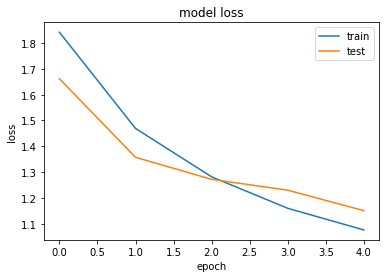

In [19]:
plot_metric(history)

In [15]:
# get a single image
idx = np.random.choice(X_test.shape[0])
X = X_test[[idx]]